In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### Secondary Education

In [2]:
edu = pd.read_csv('./data/secondary_education.csv')

In [4]:
edu = edu.drop(columns=['2019'])

In [6]:
edu = edu.dropna(thresh=4)

In [11]:
edu = edu.copy()

In [12]:
edu.average = edu.iloc[:, 1:].astype(float).mean(axis=1)

In [16]:
edu = edu.rename(columns={'Country Name' : 'Country'})

In [35]:
whr15 = pd.read_csv('C:/Users/valer/Desktop/Capstone/World_Happiness_Report/data/2015.csv')

In [36]:
edu_whr15 = edu.merge(whr15, on='Country', how='inner')

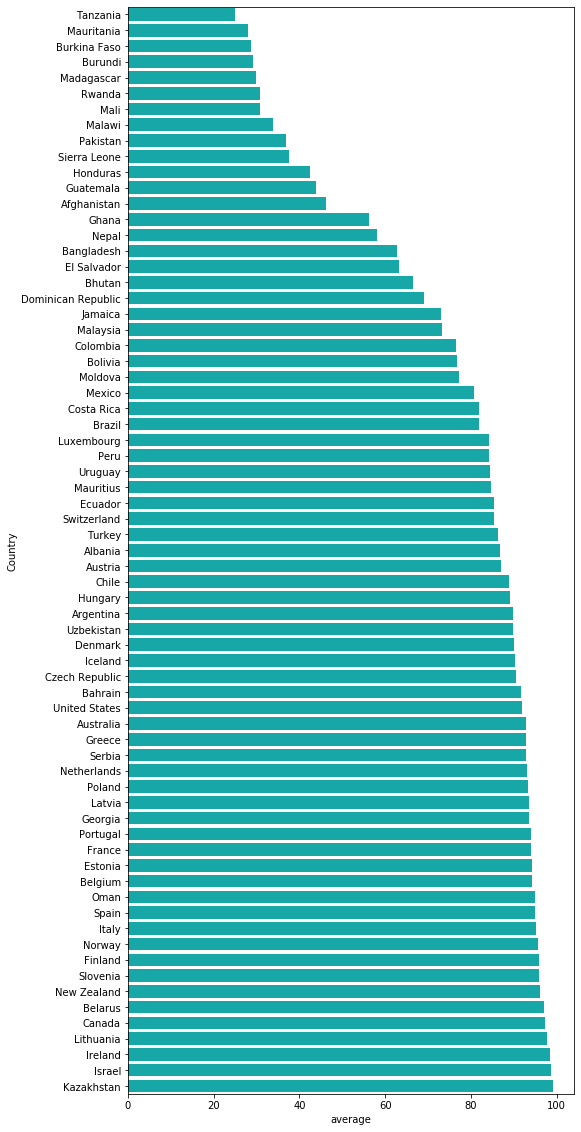

In [62]:
plt.figure(figsize=(8, 20))
sns.barplot(data=edu_whr15, y='Country', x='average', orient='h', color='c')

In [41]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand', 
'Australia', 'Sweden', 'Austria')

edu_top = edu.loc[edu['Country'].isin(top_countries)]

In [50]:
edu_whr15.average.mean()

76.87427363526571

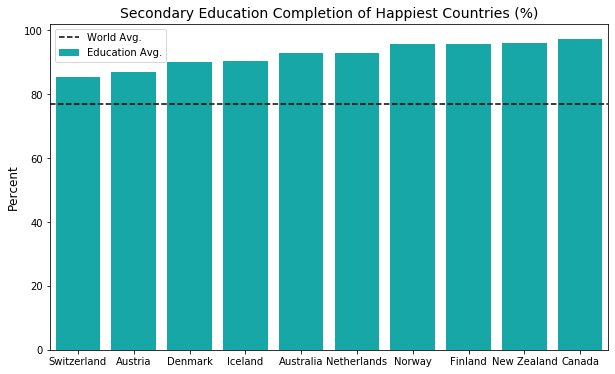

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(data=edu_top, x='Country', y='average', color='c', label='Education Avg.')
plt.axhline(y=77, color='black', linestyle='--', label='World Avg.')
plt.xlabel('')
plt.ylabel('Percent', fontsize=12)
plt.title('Secondary Education Completion of Happiest Countries (%)', fontsize=14)
plt.legend()

In [55]:
bottom_countries = ('Togo', 'Burundi', 'Syria', 'Benin', 'Rwanda', 'Afghanistan', 'Burkina Faso', 'Ivory Coast', 'Guinea',
'Chad', 'Liberia', 'Tanzania', 'Madagascar', 'Central African Republic', 'South Sudan', 'Yemen', 'Haiti', 'Malawi', 'Botswana')

edu_bottom = edu.loc[edu['Country'].isin(bottom_countries)]

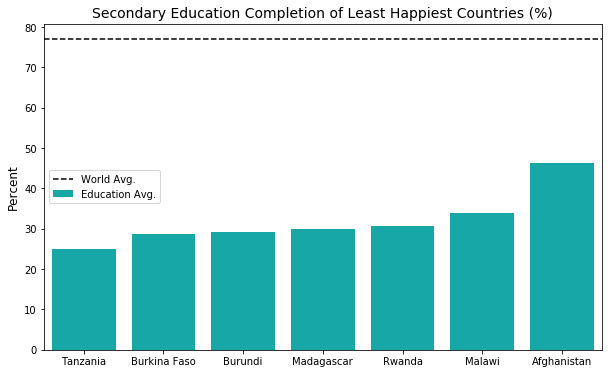

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(data=edu_bottom, x='Country', y='average', color='c', label='Education Avg.')
plt.axhline(y=77, color='black', linestyle='--', label='World Avg.')
plt.xlabel('')
plt.ylabel('Percent', fontsize=12)
plt.title('Secondary Education Completion of Least Happiest Countries (%)', fontsize=14)
plt.legend()

In [66]:
edu_whr15['edu_rank'] = edu_whr15.average.rank(ascending=False).astype(int)

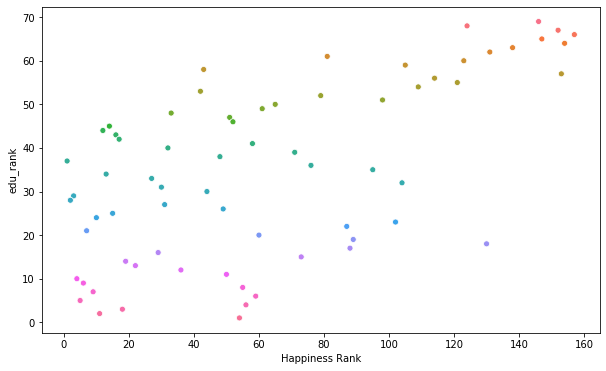

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Happiness Rank', y='edu_rank', hue='Country', data=edu_whr15, legend=False)

In [74]:
data = dict(type = 'choropleth', 
           locations = edu['Country'],
           locationmode = 'country names',
           z = edu['average'], 
           text = edu['Country'],
           colorbar = {'title':'Percent'},                              
           colorscale = 'Spectral',
           )
layout = dict(title = 'Secondary Education Completion (%)', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)


### Tertiary Education

In [88]:
edu3 = pd.read_csv('./data/tertiary_education.csv')

In [89]:
edu3 = edu3.dropna(thresh=4)

In [90]:
edu3 = edu3.copy()

In [91]:
edu3['average'] = edu3.iloc[:, 1:].astype(float).mean(axis=1)

In [103]:
edu3.sort_values('average', ascending=False).head()

,Country,2015,2016,2017,2018,average
11,Australia,118.61090,120.96570,113.14220,NaN,117.572933
88,Grenada,95.62066,96.41531,100.19640,NaN,97.410790
124,"Korea, Rep.",94.33984,94.03362,94.34969,NaN,94.241050
249,United States,88.88941,88.83505,88.16739,NaN,88.630617
23,Belarus,89.56716,88.18458,88.45143,87.42909,88.408065


In [93]:
edu3 = edu3.rename(columns={'Country Name' : 'Country'})

In [96]:
edu3_whr15 = edu3.merge(whr15, on='Country', how='inner').sort_values('average')

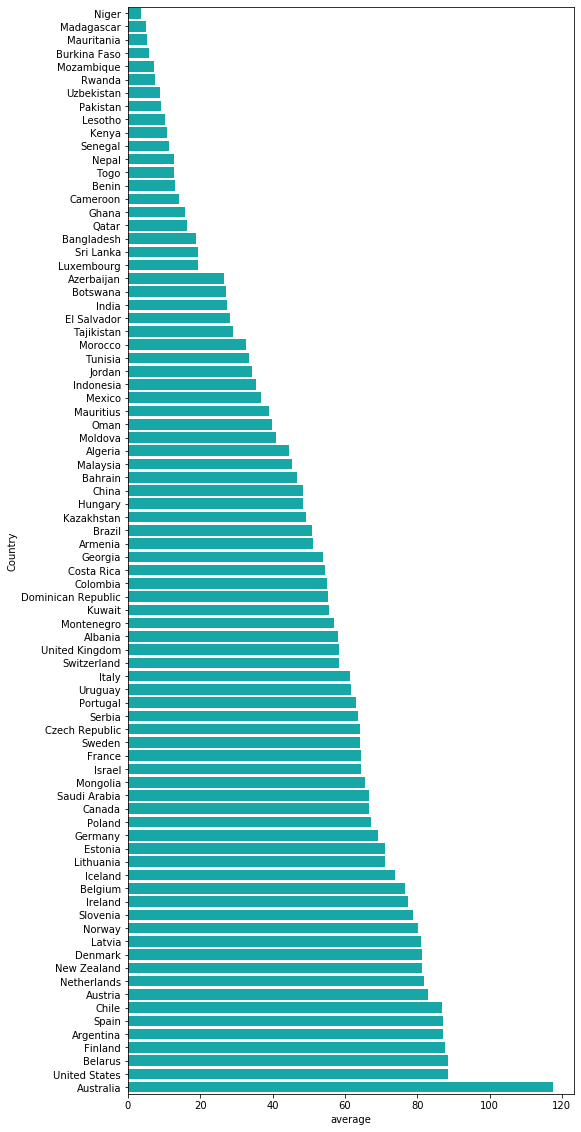

In [97]:
plt.figure(figsize=(8, 20))
sns.barplot(data=edu3_whr15, y='Country', x='average', orient='h', color='c')

In [102]:
top_countries = ('Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada', 'Netherlands', 'New Zealand', 
'Australia', 'Sweden', 'Austria')

edu3_top = edu3.loc[edu3['Country'].isin(top_countries)]

In [110]:
edu3.average.mean()

44.77729814236111

In [115]:
edu3_top = edu3_top.sort_values('average', ascending=False)

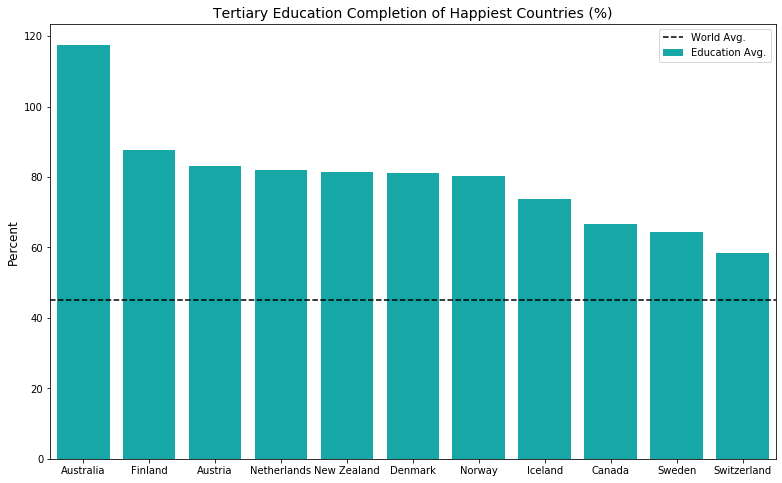

In [118]:
plt.figure(figsize=(13,8))
sns.barplot(data=edu3_top, x='Country', y='average', color='c', label='Education Avg.')
plt.axhline(y=45, color='black', linestyle='--', label='World Avg.')
plt.xlabel('')
plt.ylabel('Percent', fontsize=12)
plt.title('Tertiary Education Completion of Happiest Countries (%)', fontsize=14)
plt.legend()

In [119]:
bottom_countries = ('Togo', 'Burundi', 'Syria', 'Benin', 'Rwanda', 'Afghanistan', 'Burkina Faso', 'Ivory Coast', 'Guinea',
'Chad', 'Liberia', 'Tanzania', 'Madagascar', 'Central African Republic', 'South Sudan', 'Yemen', 'Haiti', 'Malawi', 'Botswana')

edu3_bottom = edu3.loc[edu3['Country'].isin(bottom_countries)]

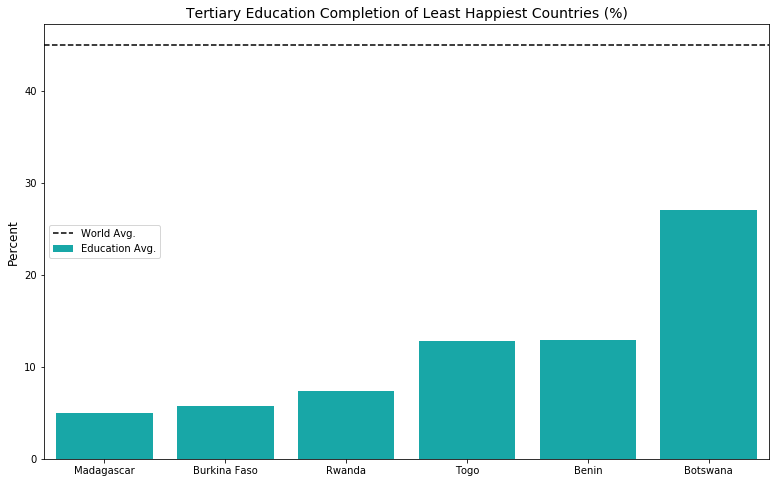

In [120]:
plt.figure(figsize=(13,8))
sns.barplot(data=edu3_bottom, x='Country', y='average', color='c', label='Education Avg.')
plt.axhline(y=45, color='black', linestyle='--', label='World Avg.')
plt.xlabel('')
plt.ylabel('Percent', fontsize=12)
plt.title('Tertiary Education Completion of Least Happiest Countries (%)', fontsize=14)
plt.legend()

In [121]:
edu3_whr15['edu3_rank'] = edu3_whr15.average.rank(ascending=False).astype(int)

In [124]:
edu3_whr15

,Country,2015,2016,2017,2018,average,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,edu3_rank
59,Niger,3.29967,3.50642,3.73290,4.41435,3.738335,Sub-Saharan Africa,144,3.845,0.03602,0.06940,0.77265,0.29707,0.47692,0.15639,0.19387,1.87877,82
51,Madagascar,4.80619,4.82550,5.28315,NaN,4.971613,Sub-Saharan Africa,147,3.681,0.03633,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100,81
56,Mauritania,5.61214,5.35248,4.99912,NaN,5.321247,Sub-Saharan Africa,124,4.436,0.03947,0.45407,0.86908,0.35874,0.24232,0.17461,0.21900,2.11773,80
8,Burkina Faso,5.06383,5.56196,6.00340,6.50187,5.782765,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,79
55,Mozambique,6.65915,7.24369,7.12271,7.31255,7.084525,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137,78
69,Rwanda,7.61135,7.66732,7.37393,6.72572,7.344580,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,77
81,Uzbekistan,8.22409,8.46360,9.18110,10.07635,8.986285,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741,76
65,Pakistan,9.22590,9.03274,9.34892,9.07988,9.171860,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709,75
45,Lesotho,10.18687,NaN,10.76225,10.19626,10.381793,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832,74
42,Kenya,9.22956,11.42673,11.46471,NaN,10.707000,Sub-Saharan Africa,125,4.419,0.04734,0.36471,0.99876,0.41435,0.42215,0.05839,0.37542,1.78555,73


Text(0.5, 1.0, 'Tertiary Education vs Happiness Rank')

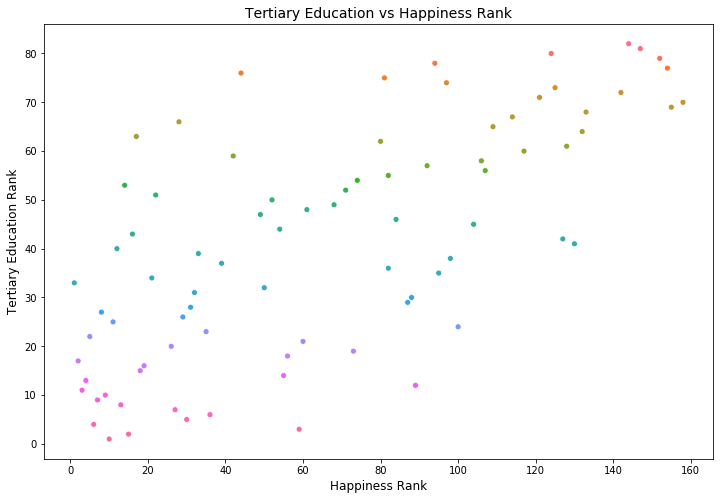

In [126]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Happiness Rank', y='edu3_rank', hue='Country', data=edu3_whr15, legend=False)
plt.xlabel('Happiness Rank', fontsize=12)
plt.ylabel('Tertiary Education Rank', fontsize=12)
plt.title('Tertiary Education vs Happiness Rank', fontsize=14)

In [127]:
data = dict(type = 'choropleth', 
           locations = edu3['Country'],
           locationmode = 'country names',
           z = edu3['average'], 
           text = edu3['Country'],
           colorbar = {'title':'Percent'},                              
           colorscale = 'Spectral',
           )
layout = dict(title = 'Tertiary Education Enrollment (%)', 
                   geo = dict(showframe = False, 
                       projection = {'type': 'miller'}))

choromap = go.Figure(data = [data], layout=layout)
#not sure how to update layout above instead of using 'update_layout' code below
choromap.update_layout(
   title={
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
iplot(choromap)
